# **Modeling and Evaluation**

## Objectives

* Answering Business requirement #2:
* - Predict whether a leaf is infected with powdery mildew or not

## Inputs

* inputs/dataset/cherry-leaves/cherry-leaves/test
* inputs/dataset/cherry-leaves/cherry-leaves/train
* inputs/dataset/cherry-leaves/cherry-leaves/validation

## Outputs

* Generate images distribution for the train, test, and validation sets
* Image augmentation
* Class indicies to change prediction inference in labels
* Create and train Machine Learning Model
* Save the model
* Learning curve plot to show model performance
* Model evaluation on pickle file
* Create a prediction using a random imag file
  

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## Import packages ##

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread

2025-08-29 11:15:01.488653: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-29 11:15:04.110475: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection'

---

### Set input directories ###

Set train, validation and test paths

In [5]:
my_data_dir = "inputs/datasets/cherry-leaves/cherry-leaves"
train_path = my_data_dir + "/train"
val_path = my_data_dir + "/validation"
test_path = my_data_dir + "/test"

### Set Output Directory ###

In [6]:
version = "version1"
file_path = f"outputs/{version}"
if "outputs" in os.listdir(current_dir) and version in os.listdir(current_dir + "/outputs"):
    print("Old version is already available. Create a new version.")
    pass
else:
    os.makedirs(name=file_path)

Old version is already available. Create a new version.


### Set labels ###

In [7]:
labels = os.listdir(train_path)
print(f"The Project Labels are {labels}")

The Project Labels are ['powdery_mildew', 'healthy']


### Set Image Shape ###

In [8]:
import joblib
version = "version1"
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pk1")
image_shape

(160, 160, 3)

---

### Number of images in train, test and validation data ###

Count the number of images for each set and label

In [9]:
data = {
    "Set": [],
    "Label": [],
    "Frequency": []
}
folders = ["train", "validation", "test"]
for folder in folders:
    for label in labels:
        row = {
            "Set": folder,
            "Label": label,
            "Frequency": int(len(os.listdir(my_data_dir + "/" + folder + "/" + label)))
        }
        for key, value in row.items():
            data[key].append(value)
        print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+"/"+ folder + "/" + label))} images")
df_freq = pd.DataFrame(data)

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images


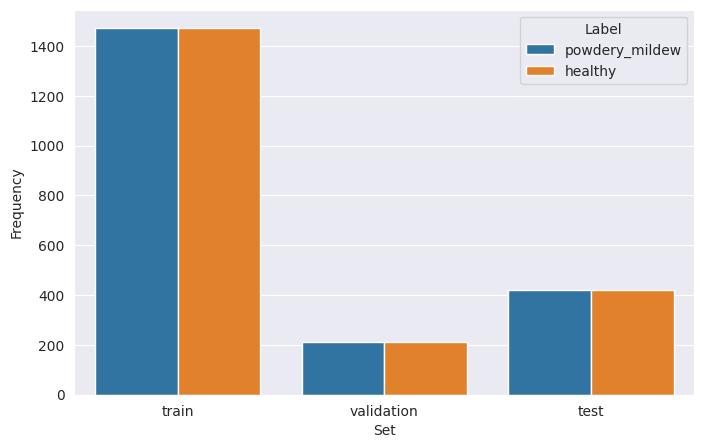

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x="Set", y="Frequency", hue="Label")
plt.savefig(f"{file_path}/labels_distribution.png", bbox_inches="tight",dpi=150)
plt.show()

---

## Image Data Augmentation ##

### Image Data Generator ###

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialise ImageDataGenerator ###

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode="nearest",
                                          rescale=1./255
                                          )

### Batch Size ###

In [13]:
batch_size = 30

### Augment training image dataset ###

In [14]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode="rgb",
                                                     batch_size=batch_size,
                                                     class_mode="binary",
                                                     shuffle=True)

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment Validation Image Dataset ###

In [15]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                     target_size=image_shape[:2],
                                                     color_mode="rgb",
                                                     batch_size=batch_size,
                                                     class_mode="binary",
                                                     shuffle=False)

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augument Test Image Dataset ###

In [16]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                     target_size=image_shape[:2],
                                                     color_mode="rgb",
                                                     batch_size=batch_size,
                                                     class_mode="binary",
                                                     shuffle=False)

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot Augmented Training Image ###

(30, 160, 160, 3)


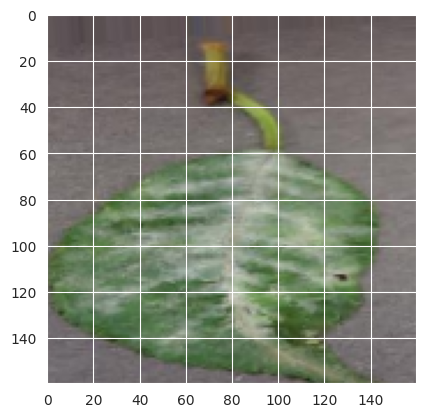

(30, 160, 160, 3)


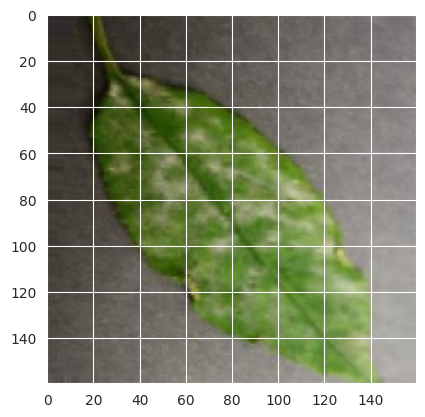

(30, 160, 160, 3)


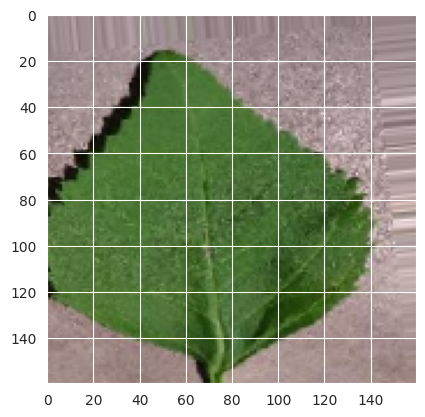

In [18]:
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Plot Augmented Validation Images ###

(30, 160, 160, 3)


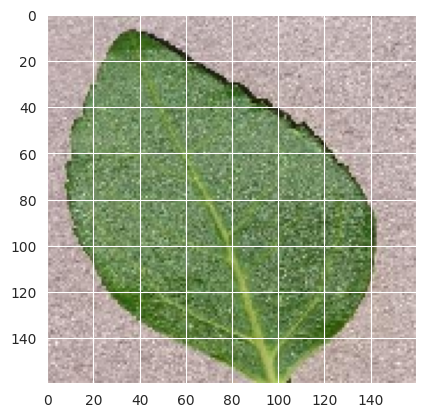

(30, 160, 160, 3)


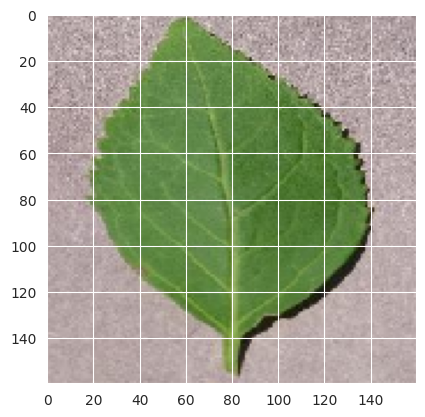

(30, 160, 160, 3)


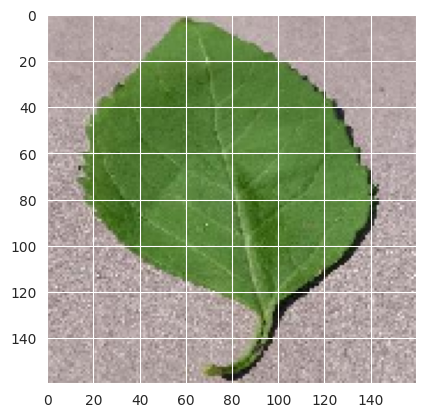

In [19]:
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Plot Augmented Test Images ###

(30, 160, 160, 3)


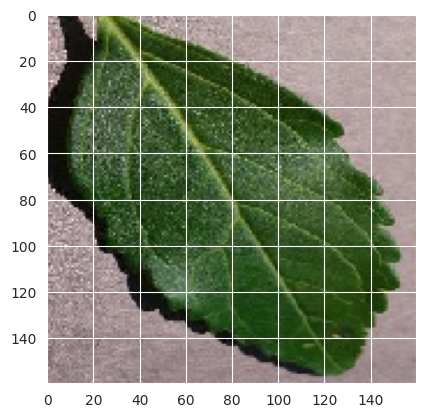

(30, 160, 160, 3)


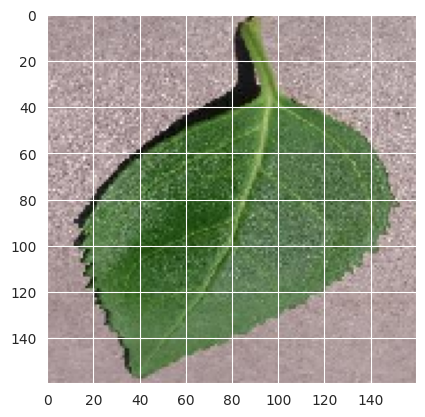

(30, 160, 160, 3)


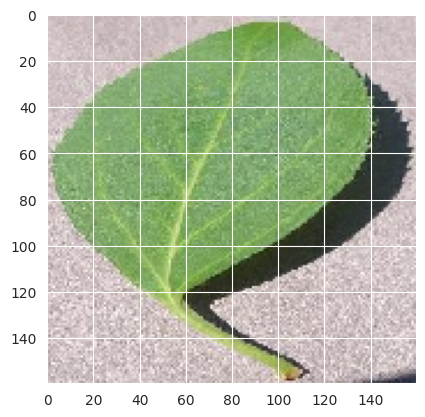

In [20]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Save class_indices ###

In [21]:
joblib.dump(value=train_set.class_indices, filename=f"{file_path}/class_indicies.pk1")

['outputs/version1/class_indicies.pk1']

---

## Model Creation ##

### Import Model Packages ##

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Create Model ###

In [23]:
def create_tf_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3),
                     input_shape=image_shape, activation="relu",))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
                     input_shape=image_shape, activation="relu",))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
                     input_shape=image_shape, activation="relu",))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model

### Model Summary ###

In [24]:
create_tf_model().summary()

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,710,785 (10.34 MB)

 Trainable params: 2,710,785 (10.34 MB)

 Non-trainable params: 0 (0.00 B)

### Early Stopping ###

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=3)

### Fit model for model training ###

In [29]:
model = create_tf_model()
model.fit(train_set,
          batch_size = batch_size,
          epochs=20,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data = validation_set,
          callbacks = [early_stop],
          verbose = 1
)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 466ms/step - accuracy: 0.8250 - loss: 0.3435 - val_accuracy: 0.9881 - val_loss: 0.0512
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9333 - loss: 0.1176 - val_accuracy: 0.9905 - val_loss: 0.0415
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 446ms/step - accuracy: 0.9870 - loss: 0.0434 - val_accuracy: 0.9976 - val_loss: 0.0409


### Model Save ###

In [30]:
model.save("outputs/version1/mildew_detector_model.h5")

---

## Model Performance ##

### Model Learning Curve ##

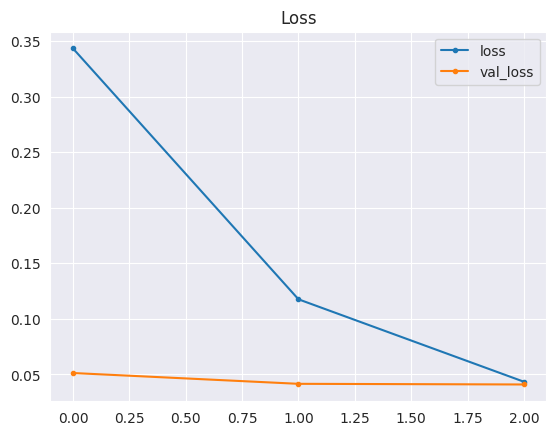

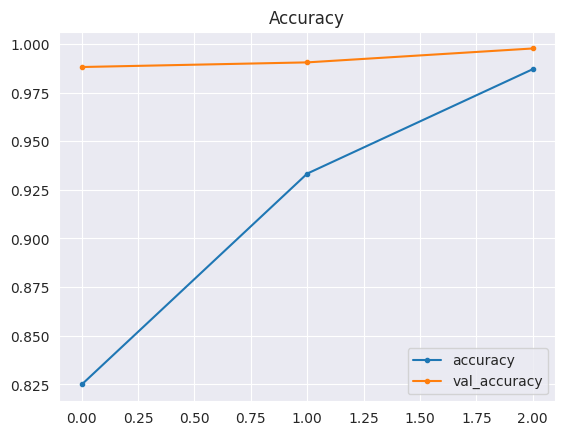

In [31]:
losses = pd.DataFrame(model.history.history)
sns.set_style("darkgrid")
losses[["loss", "val_loss"]].plot(style=".-")
plt.title("Loss")
plt.savefig(f"{file_path}/model_training_losses.png", bbox_inches="tight", dpi=150)
plt.show()
print("\n")
losses[["accuracy", "val_accuracy"]].plot(style=".-")
plt.title("Accuracy")
plt.savefig(f"{file_path}/model_training_acc.png", bbox_inches="tight", dpi=150)
plt.show()

## Model Evaluation ##

In [32]:
from keras.models import load_model
model = load_model("outputs/version1/mildew_detector_model.h5")

Use the test set to evaluate the model

In [33]:
evaluation = model.evaluate(test_set)

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9917 - loss: 0.0318


Save evaluation

In [34]:
joblib.dump(value=evaluation, filename=f"outputs/version1/evaluation.pk1")

['outputs/version1/evaluation.pk1']

## Predict on new data ##

Image shape: (160, 160), Image mode: RGB


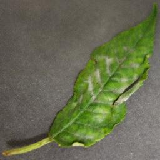

In [35]:
from tensorflow.keras.preprocessing import image
pointer = 66
label = labels[0]
pil_image = image.load_img(test_path + "/" + label + "/" + os.listdir(test_path+"/" + label)[pointer], target_size =image_shape, color_mode="rgb")
print(f"Image shape: {pil_image.size}, Image mode: {pil_image.mode}")
pil_image

Convert the image to an array, so that can prepare for prediction

In [36]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 160, 160, 3)


Prediction

In [37]:
pred_proba = model.predict(my_image)[0, 0]
target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]
if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba
print(pred_proba)
print(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
0.9999408
powdery_mildew


---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    os.chdir("/workspaces/mildew-detection/")
    os.system("git add .")
    commit_message = "Save Modelling and Evaluating Notebook"
    os.system(f"git commit -m '{commit_message}'")
    os.system("git push origin main")
except Exception as e:
    print(e)
